In [1]:
# Nạp thư viện
!pip install -U vnstock3
!pip install xlsxwriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 2.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
from vnstock3 import Vnstock
from bs4 import BeautifulSoup


    Khi tiếp tục sử dụng Vnstock3, bạn xác nhận rằng bạn đã đọc, hiểu và đồng ý với Chính sách quyền riêng tư và Điều khoản, điều kiện về giấy phép sử dụng Vnstock3.

    Chi tiết:

    - Giấy phép sử dụng phần mềm: https://vnstocks.com/docs/tai-lieu/giay-phep-su-dung
    - Chính sách quyền riêng tư: https://vnstocks.com/docs/tai-lieu/chinh-sach-quyen-rieng-tu
    


In [3]:
# VCI là nguồn dữ liệu từ CK Vietcap bên cạnh nguồn từ TCBS
stock = Vnstock().stock(symbol='ACB', source='VCI')
stock.listing.all_symbols()

2024-08-20 04:58:07,034 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS


,ticker,organ_name
0,A32,Công ty Cổ phần 32
1,AAA,Công ty Cổ phần Nhựa An Phát Xanh
2,AAM,Công ty Cổ Phần Thủy Sản MeKong
3,AAS,Công ty Cổ phần Chứng khoán SmartInvest
4,AAT,Công ty Cổ phần Tập đoàn Tiên Sơn Thanh Hóa
...,...,...
1593,XPH,Công ty Cổ phần Xà phòng Hà Nội
1594,YBC,Công ty Cổ phần Xi măng và Khoáng sản Yên Bái
1595,YBM,Công ty Cổ phần Khoáng sản Công nghiệp Yên Bái
1596,YEG,Công ty Cổ phần Tập đoàn Yeah1


In [4]:
# Dữ liệu bao gồm tất cả các mã không kể đang niêm yết hay không
stock.listing.symbols_by_exchange()

,symbol,id,type,exchange,en_organ_name,en_organ_short_name,organ_short_name,organ_name
0,YTC,8425620,STOCK,UPCOM,Ho Chi Minh City Medical Import Export Joint S...,YTECO,XNK Y tế TP.HCM,Công ty Cổ phần Xuất nhập khẩu Y tế Thành phố ...
1,YEG,8424579,STOCK,HSX,Yeah1 Group Corporation,Yeah1 Group,Tập đoàn Yeah1,Công ty Cổ phần Tập đoàn Yeah1
2,YBM,8424470,STOCK,HSX,Yen Bai Industry Mineral Joint Stock Company,Yen Bai Industry Mineral,Khoáng sản CN Yên Bái,Công ty Cổ phần Khoáng sản Công nghiệp Yên Bái
3,YBC,8425710,STOCK,UPCOM,YenBai Cement and Minerals Joint Stock Company,YenBai Cement and Minerals,Xi măng và Khoáng sản Yên Bái,Công ty Cổ phần Xi măng và Khoáng sản Yên Bái
4,XPH,8425864,STOCK,UPCOM,Hanoi Soap Joint Stock Company,Hanoi Soap,Xà phòng Hà Nội,Công ty Cổ phần Xà phòng Hà Nội
...,...,...,...,...,...,...,...,...
2544,AAS,8425599,STOCK,UPCOM,Smart Invest Securities Joint Stock Company,SmartInvest Securities,Chứng khoán SmartInvest,Công ty Cổ phần Chứng khoán SmartInvest
2545,AAM,8424957,STOCK,HSX,Mekong Fisheries Joint Stock Company,Mekong Fisheries,Thủy sản Mekong,Công ty Cổ Phần Thủy Sản MeKong
2546,AAH,13216673,STOCK,UPCOM,Hop Nhat Joint Stock Company,Hop Nhat Coal,Than Hợp Nhất,Công ty Cổ phần Hợp Nhất
2547,AAA,8424464,STOCK,HSX,An Phat Bioplastics Joint Stock Company,An Phat Bioplastics,An Phát Bioplastics,Công ty Cổ phần Nhựa An Phát Xanh


In [5]:
stock.listing.symbols_by_industries()

,symbol,organ_name,en_organ_name,icb_name3,en_icb_name3,icb_name2,en_icb_name2,icb_name4,en_icb_name4,com_type_code,icb_code1,icb_code2,icb_code3,icb_code4
0,CCC,Công ty Cổ Phần Xây Dựng CDC,CDC Construction Joint Stock Company,Xây dựng và Vật liệu,Construction & Materials,Xây dựng và Vật liệu,Construction & Materials,Xây dựng,Heavy Construction,CT,2000,2300,2350,2357
1,HIO,Công ty Cổ Phần Helio Energy,Helio Energy Joint Stock Company,Sản xuất & Phân phối Điện,Electricity,"Điện, nước & xăng dầu khí đốt",Utilities,Sản xuất & Phân phối Điện,Conventional Electricity,CT,7000,7500,7530,7535
2,TSA,Công ty Cổ Phần Đầu Tư Và Xây Lắp Trường Sơn,Truong Son Investment And Construction Joint S...,Xây dựng và Vật liệu,Construction & Materials,Xây dựng và Vật liệu,Construction & Materials,Xây dựng,Heavy Construction,CT,2000,2300,2350,2357
3,CST,Công ty Cổ phần Than Cao Sơn - TKV,Cao Son Coal Joint Stock Company,Khai khoáng,Mining,Tài nguyên Cơ bản,Basic Resources,Khai thác Than,Coal,CT,1000,1700,1770,1771
4,SGI,Công ty Cổ phần Đầu tư phát triển Sài Gòn 3 Group,Sai Gon 3 Group Investment Development Joint S...,Hàng cá nhân,Personal Goods,Hàng cá nhân & Gia dụng,Personal & Household Goods,Hàng May mặc,Clothing & Accessories,CT,3000,3700,3760,3763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584,VIB,Ngân hàng Thương mại Cổ phần Quốc tế Việt Nam,Viet Nam International Commercial Joint Stock ...,Ngân hàng,Banks,Ngân hàng,Banks,Ngân hàng,Banks,NH,8301,8300,8350,8355
1585,VIC,Tập đoàn Vingroup - Công ty CP,VinGroup Joint Stock Company,Bất động sản,Real Estate Investment & Services,Bất động sản,Real Estate,Bất động sản,Real Estate Holding & Development,CT,8000,8600,8630,8633
1586,PVO,Công ty Cổ phần Dầu nhờn PV Oil,PV Oil Lube Joint Stock Company,Hóa chất,Chemicals,Hóa chất,Chemicals,"Sản phẩm hóa dầu, Nông dược & Hóa chất khác",Specialty Chemicals,CT,1000,1300,1350,1357
1587,DVM,Công ty Cổ phần Dược liệu Việt Nam,Vietnam Medicinal Materials Joint Stock Company,Dược phẩm,Pharmaceuticals & Biotechnology,Y tế,Health Care,Dược phẩm,Pharmaceuticals,CT,4000,4500,4570,4577


In [6]:
# Liệt kê tất cả mã chứng khoán theo nhóm phân loại. Ví dụ HOSE, VN30, VNMidCap, VNSmallCap, VNAllShare, VN100, ETF, HNX, HNX30, HNXCon, HNXFin, HNXLCap, HNXMSCap, HNXMan, UPCOM, FU_INDEX (mã chỉ số hợp đồng tương lai), CW (chứng quyền)
stock.listing.symbols_by_group('VN30')

,symbol
0,ACB
1,BCM
2,BID
3,BVH
4,CTG
5,FPT
6,GAS
7,GVR
8,HDB
9,HPG


In [7]:
stock.listing.industries_icb()

,icb_name,en_icb_name,icb_code,level
0,Sản xuất Dầu khí,Oil & Gas Producers,0530,3
1,"Thiết bị, Dịch vụ và Phân phối Dầu khí","Oil Equipment, Services & Distribution",0570,3
2,Hóa chất,Chemicals,1350,3
3,Lâm nghiệp và Giấy,Forestry & Paper,1730,3
4,Kim loại,Industrial Metals & Mining,1750,3
...,...,...,...,...
151,Viễn thông,Telecommunications,6000,1
152,Tiện ích Cộng đồng,Utilities,7000,1
153,Tài chính,Financials,8000,1
154,Ngân hàng,Banks,8301,1


In [8]:
df = stock.quote.history(start='2023-08-15', end = '2024-08-15', interval='1D')
df

,time,open,high,low,close,volume
0,2023-08-15,19.45,19.53,19.19,19.19,6464684
1,2023-08-16,19.19,19.36,19.15,19.24,8402525
2,2023-08-17,19.28,19.32,19.07,19.07,10125955
3,2023-08-18,19.07,19.07,18.40,18.40,20459276
4,2023-08-21,18.35,18.65,18.35,18.48,7981455
...,...,...,...,...,...,...
247,2024-08-12,23.60,23.80,23.30,23.80,4197300
248,2024-08-13,23.55,23.80,23.50,23.60,2850000
249,2024-08-14,23.70,23.80,23.55,23.55,3316800
250,2024-08-15,23.55,23.60,23.45,23.50,2655100


In [9]:
#df.to_csv(r"drive/MyDrive/AI project/datafinace.csv", index=False)

# Google Stock Price Prediction Using LSTM

In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
dataset_train = pd.read_csv("drive/MyDrive/AI project/datafinace.csv")
dataset_train.head()

,time,open,high,low,close,volume
0,2023-08-15,19.45,19.53,19.19,19.19,6464684
1,2023-08-16,19.19,19.36,19.15,19.24,8402525
2,2023-08-17,19.28,19.32,19.07,19.07,10125955
3,2023-08-18,19.07,19.07,18.40,18.40,20459276
4,2023-08-21,18.35,18.65,18.35,18.48,7981455


In [13]:
training_set = dataset_train.iloc[:,1:2].values

print(training_set)
print(training_set.shape)

[[19.45]
 [19.19]
 [19.28]
 [19.07]
 [18.35]
 [18.56]
 [18.65]
 [18.35]
 [18.48]
 [18.48]
 [18.52]
 [18.52]
 [18.86]
 [19.07]
 [19.11]
 [19.32]
 [19.24]
 [19.15]
 [18.77]
 [19.11]
 [18.9 ]
 [18.98]
 [18.98]
 [18.86]
 [18.73]
 [18.82]
 [18.65]
 [18.73]
 [18.52]
 [18.4 ]
 [18.35]
 [18.31]
 [18.31]
 [18.31]
 [18.1 ]
 [18.27]
 [18.14]
 [18.23]
 [18.9 ]
 [19.15]
 [19.07]
 [18.98]
 [18.94]
 [18.98]
 [18.86]
 [18.52]
 [18.31]
 [18.56]
 [18.44]
 [18.65]
 [18.27]
 [18.02]
 [18.14]
 [17.93]
 [17.98]
 [18.27]
 [18.73]
 [18.65]
 [18.56]
 [18.56]
 [19.24]
 [18.82]
 [18.86]
 [18.86]
 [19.32]
 [19.53]
 [19.66]
 [18.82]
 [19.03]
 [18.9 ]
 [19.07]
 [18.73]
 [18.52]
 [18.4 ]
 [18.48]
 [18.52]
 [18.61]
 [18.52]
 [18.73]
 [18.61]
 [18.73]
 [18.82]
 [18.86]
 [18.86]
 [18.9 ]
 [18.82]
 [18.98]
 [19.07]
 [19.15]
 [19.36]
 [19.49]
 [19.49]
 [19.53]
 [19.66]
 [19.49]
 [19.57]
 [20.08]
 [20.12]
 [20.58]
 [21.17]
 [21.25]
 [21.59]
 [21.21]
 [21.17]
 [21.34]
 [21.13]
 [21.84]
 [21.34]
 [21.38]
 [21.38]
 [21.67]
 

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_training_set = scaler.fit_transform(training_set)

scaled_training_set

array([[0.21199442],
       [0.17573222],
       [0.18828452],
       [0.15899582],
       [0.05857741],
       [0.08786611],
       [0.10041841],
       [0.05857741],
       [0.07670851],
       [0.07670851],
       [0.08228731],
       [0.08228731],
       [0.12970711],
       [0.15899582],
       [0.16457462],
       [0.19386332],
       [0.18270572],
       [0.17015342],
       [0.11715481],
       [0.16457462],
       [0.13528591],
       [0.14644351],
       [0.14644351],
       [0.12970711],
       [0.11157601],
       [0.12412831],
       [0.10041841],
       [0.11157601],
       [0.08228731],
       [0.06555091],
       [0.05857741],
       [0.05299861],
       [0.05299861],
       [0.05299861],
       [0.0237099 ],
       [0.0474198 ],
       [0.0292887 ],
       [0.041841  ],
       [0.13528591],
       [0.17015342],
       [0.15899582],
       [0.14644351],
       [0.14086471],
       [0.14644351],
       [0.12970711],
       [0.08228731],
       [0.05299861],
       [0.087

In [15]:
x_train = []
y_train = []

for i in range(60, len(scaled_training_set)):
  x_train.append(scaled_training_set[i-60:i, 0])
  y_train.append(scaled_training_set[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [16]:
print(x_train.shape)
print(y_train.shape)

(192, 60)
(192,)


In [17]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(192, 60, 1)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Input

regressor = Sequential()

regressor.add(Input(shape=(x_train.shape[1], 1)))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [19]:
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - loss: 0.3744
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.0693
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0409
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0222
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 0.0259
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0207
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0153
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 0.0203
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - loss: 0.0188
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - loss: 0.0139
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - loss: 0.0139
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.0151
Epoch 13/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0136
Epoch 14/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0150
Epoch 15/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0136
Epoch 16/100
6/

In [20]:
#Extracting the Actual Stock Prices
dataset_test = pd.read_csv("drive/MyDrive/AI project/datafinace.csv")
real_stock_price = dataset_test.iloc[:,1:2].values

In [21]:
#Preparing the input for the model
dataset_total = pd.concat((dataset_train['open'], dataset_test['open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

x_test = []
for i in range(60, len(inputs)):
  x_test.append(inputs[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [22]:
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step


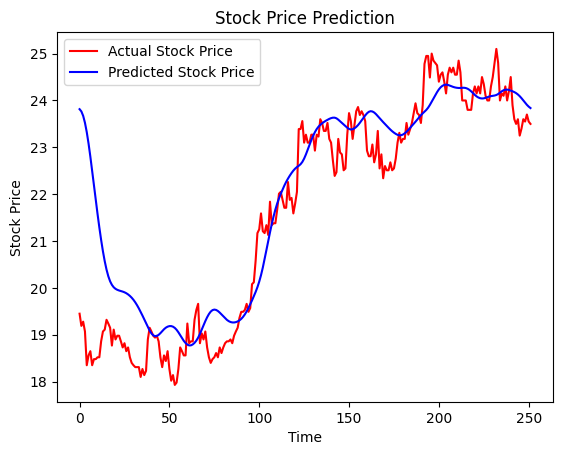

In [23]:
plt.plot(real_stock_price, color='red', label='Actual Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(real_stock_price, predicted_stock_price)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.2272655316950476
